Cristina Cicali, Clelia Corridori, Anna Steffinlongo

# OTOC for different values of h effective


In [1]:
#Call of all the libreries needed in the computation. 
from numpy import *
import math
import matplotlib.pyplot as plt
from OTOCfunc import *


In [2]:
#Parameters to compute the Out-Of-Time-Correlator OTOC for different values of h effective 
#N are the number of steps chosen for the computation. 
# T is the period of the kicks which is proportional to heff, we have created a vector with different values 
# of h_eff we have chosen h_eff = 2**-2,2**-4,2**-6,2**-8. The h_eff is varying keeping fixed the value of the 
#kicking strenght. We have chosen K=4
# Nkicks is the number of kicks.
 
N=2**14
T=[2**-2,2**-4,2**-6,2**-8]
K=4
Nkicks=100
trials=3

#Computation of the mean of the OTOC over the number of trials with the function mean_otoc_heff contained in the 
#python file OTOCfunc.
mean_C=mean_otoc_heff(N,T,K,Nkicks,trials,True)

#Vector for the number of kikc
Kick=arange(1,Nkicks+1,1)

Trial # 0
Trial # 1
Trial # 2


In [3]:
#Due to the time needed for the computation of the OTOC we saved the data in a txt file in order to only load
#the file when needed
saveF=True
if saveF==True:
    with open('OTOC-3trials-mean-FigOTOCheff.txt', 'w') as out:
        for line in mean_C:
            savetxt(out, line)


In [4]:
# # to load data
# load=False
# if load==True:
#     # The value selected here must be the same of the quantities above chosen for the saved file!
#     N=2**14
#     T=[2**-2,2**-4,2**-6,2**-8]
#     K=4
#     Nkicks=100
#     trials=3
#     Kick=arange(1,Nkicks+1,1)

#     data = loadtxt("OTOC_heff.txt", comments="#", delimiter="\n", unpack=False)
#     mean_C=reshape(data.astype(float),(Nkicks,len(K),trials))

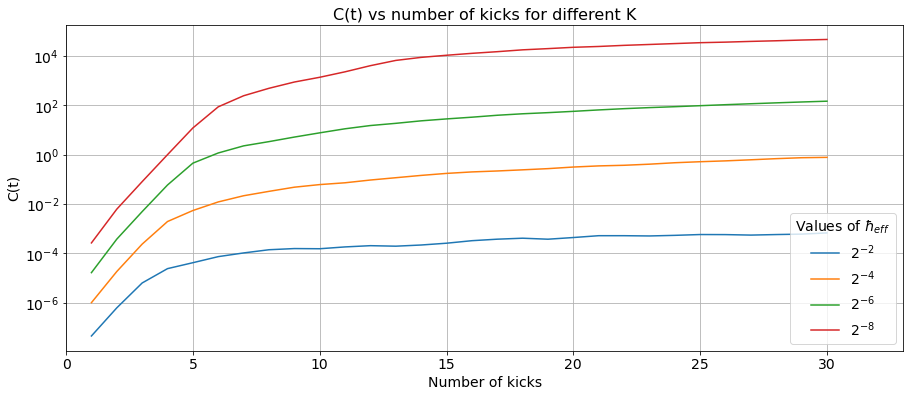

In [5]:
#Plot of the OTOC as function of the number of kicks, and also for different values of h_eff setting the log 
#scale in the y axis. 
plt.figure(figsize=(15, 6))
plt.yscale('log')

for ii in range(len(T)):
    plt.plot(Kick[:30],mean_C[:30,ii])    
label=['$2^{-2}$','$2^{-4}$','$2^{-6}$','$2^{-8}$']

plt.legend(label, loc='lower right',title='Values of $\hbar_{eff}$', fontsize='14',title_fontsize=14)
plt.xlim([0,33])
plt.xlabel('Number of kicks', size=14)
plt.ylabel('C(t)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('C(t) vs number of kicks for different K', size=16) 
plt.grid()
plt.savefig('OTOC-heff.png', dpi=100)

In [6]:
#Computation of the logarithm (variable log_C) of the OTOC. First we initialize the variable log_C and then 
#we computed the values for each value of  and also for different values of the h_eff.

log_C_eff=zeros([Nkicks,len(T)])

for jj in range(1,Nkicks):
    log_C_eff[jj,:]=log(mean_C[jj,:]/mean_C[0,:])/(2*jj)
    
#Computation of the asymptotic behaviour which is proportional to t^-1
def asymp(Kick):
    return((1/Kick[1:])*11)

funz_t=asymp(Kick)    



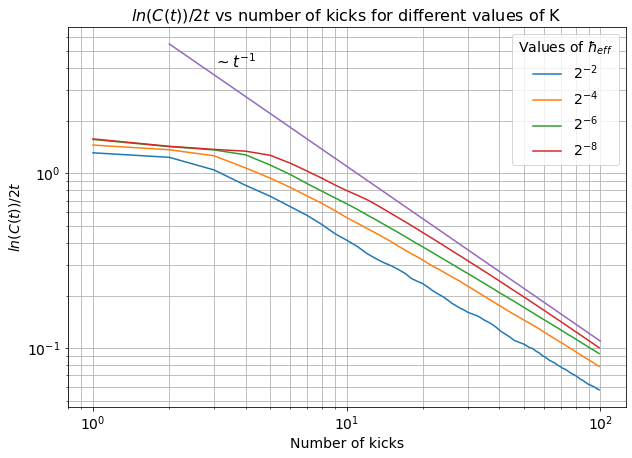

In [7]:
#Plot of log_C_eff Vs the time for different values of h_eff and of with purple line the asymptotic value. This function 
#is plotted setting the log scale both on x and y axis. In this is possible obeserve a costant in time behaviour 
# for each values of h_eff wich start to decrease for different at a different value of t correspondent to the Erenfest time

plt.figure(figsize=(10, 7))
plt.xscale('log')
plt.yscale('log')
for kk in range(len(T)):
    plt.plot(arange(1,Nkicks),log_C_eff[1:,kk]) 
label=['$2^{-2}$','$2^{-4}$','$2^{-6}$','$2^{-8}$']


plt.plot(Kick[1:],funz_t[:])
plt.text(3, 4, "$\sim t^{-1}$", fontsize=15)
plt.legend(label, loc='upper right', title='Values of $\hbar_{eff}$', title_fontsize=14, fontsize=14)
plt.xlabel('Number of kicks', size=14)
plt.ylabel('$ln (C(t)) /2t$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('$ln (C(t)) /2t$ vs number of kicks for different values of K', size=16)
plt.savefig('OTOClog-log.png', dpi=100)
plt.grid(True, which="both")

plt.savefig('OTOClog-log-heff.png', dpi=100)